[[1.         0.         0.         ... 0.10041911 0.31498471 0.01223242]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.25121542 0.39755352 0.10091743]
 ...
 [1.         0.         0.         ... 0.2364627  0.4617737  0.06116208]
 [0.5        0.         0.         ... 0.26119028 0.41896024 0.26605505]
 [1.         0.         0.         ... 0.         0.         0.        ]]


/Users/klz/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/klz/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/klz/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/klz/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/klz/opt/a

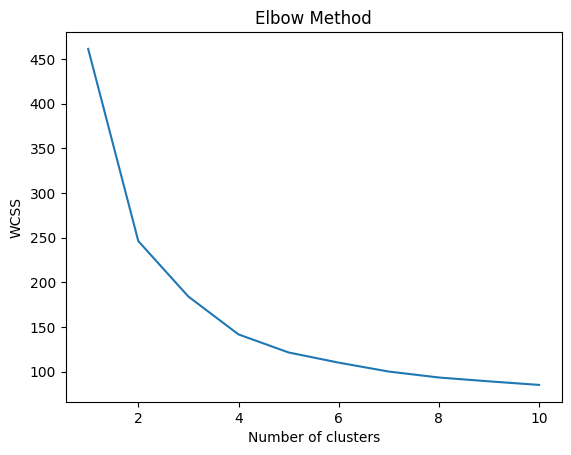

/Users/klz/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


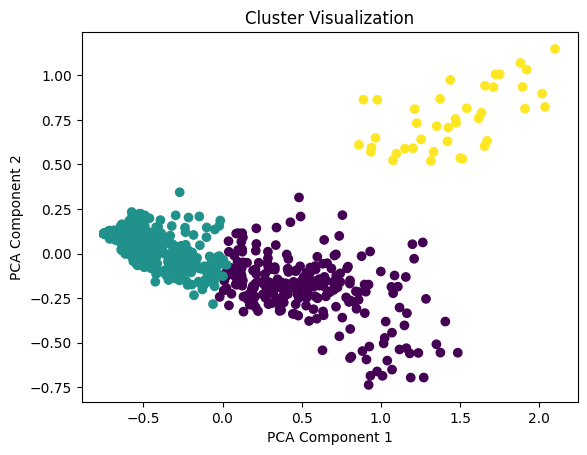

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


training_data = pd.read_csv('Training.csv')
columns_to_scale = ['draftpick', 'first_year_ROM_amt', 'All_Rookie_First', 'All_Rookie_Second', 
                    'four_yrs_POW', 'Rookie_ppg', 'Rookie_apg', 'Rookie_rpg', 'Rookie_tov_pct', 
                    'Rookie_mins', 'avg_4yr_ppg', 'avg_4yr_apg', 'avg_4yr_rpg', 'tot_mins', 
                    'tot_games', 'tot_games_start']

scaler = MinMaxScaler()
X_klabel = scaler.fit_transform(training_data[columns_to_scale])

print(X_klabel)

# Determine the optimal number of clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_klabel)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('image2.png')
plt.show()


# Choose the optimal number of clusters based on the plot
optimal_clusters = 3  # Replace this with your choice

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
training_data['kmeans_labels'] = kmeans.fit_predict(X_klabel)

# Visualizing clusters (if feasible)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_klabel)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=training_data['kmeans_labels'])
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.savefig('image1.png')
plt.show()




In [2]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(X_klabel, training_data[['kmeans_labels']])
silhouette_kmeans

/Users/klz/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.44975031629558804

In [3]:
import pandas as pd
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
training_data = pd.read_csv('Training.csv')
print(training_data.shape)
print(training_data.isna().sum())
training_data.head()

(674, 25)
Unnamed: 0              0
nbapersonid             0
draftyear               0
draftpick               0
first_year_ROM_amt      0
All_Rookie_First        0
All_Rookie_Second       0
four_yrs_POW            0
Rookie_ppg              0
Rookie_apg              0
Rookie_rpg              0
Rookie_tov_pct          0
Rookie_mins             0
avg_4yr_ppg             0
avg_4yr_apg             0
avg_4yr_rpg             0
tot_mins                0
tot_games               0
tot_games_start         0
first_year_achieved     0
second_year_achieved    0
third_year_achieved     0
fourth_year_achieved    0
career_outcome          0
simple_label            0
dtype: int64


,Unnamed: 0,nbapersonid,draftyear,draftpick,first_year_ROM_amt,All_Rookie_First,All_Rookie_Second,four_yrs_POW,Rookie_ppg,Rookie_apg,...,avg_4yr_rpg,tot_mins,tot_games,tot_games_start,first_year_achieved,second_year_achieved,third_year_achieved,fourth_year_achieved,career_outcome,simple_label
0,0,201858,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.437019,1198,103,4,1,2,2,2,2,2
1,1,203141,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0,0,0,1,1,1,1,3,2
2,2,201229,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,3.611589,2997,130,33,1,2,3,3,3,2
3,3,201234,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.416667,108,12,0,1,2,1,2,1,1
4,4,201235,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,1.555556,24,5,0,2,2,1,1,1,1


In [5]:
training_data.drop(training_data.columns[[0]], axis=1, inplace=True)
training_data.head()

,nbapersonid,draftyear,draftpick,first_year_ROM_amt,All_Rookie_First,All_Rookie_Second,four_yrs_POW,Rookie_ppg,Rookie_apg,Rookie_rpg,...,avg_4yr_rpg,tot_mins,tot_games,tot_games_start,first_year_achieved,second_year_achieved,third_year_achieved,fourth_year_achieved,career_outcome,simple_label
0,201858,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,...,2.437019,1198,103,4,1,2,2,2,2,2
1,203141,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,...,0.000000,0,0,0,1,1,1,1,3,2
2,201229,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,...,3.611589,2997,130,33,1,2,3,3,3,2
3,201234,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,...,0.416667,108,12,0,1,2,1,2,1,1
4,201235,2007.0,61.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.033,...,1.555556,24,5,0,2,2,1,1,1,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
'''
mapping = {
    'Elite': 6,
    'All-Star': 5,
    'Starter': 4,
    'Rotation': 3,
    'Roster': 2,
    'Out of the League': 1
}
'''

# Selecting the features (X) and the target variable (y)
X = training_data[['draftpick', 'first_year_ROM_amt', 'All_Rookie_First', 'All_Rookie_Second', 
                   'four_yrs_POW', 'Rookie_ppg', 'Rookie_apg', 'Rookie_rpg', 'Rookie_tov_pct', 
                   'Rookie_mins', 'avg_4yr_ppg', 'avg_4yr_apg', 'avg_4yr_rpg', 'tot_mins', 
                   'tot_games', 'tot_games_start']]
y = training_data['career_outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

In [8]:
# Accuracy of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.60
[[94  2  6  1  0  0]
 [22  3  7  3  0  0]
 [11  1  8  4  0  2]
 [ 4  1  5 14  1  6]
 [ 0  0  1  1  0  1]
 [ 0  0  0  3  0  2]]


Class 1 (First Row)
True Positives (TP): 93 (correctly predicted as Class 1)    
False Negatives (FN): 10 (actual Class 1, but predicted as other classes)    
The model performs best for this class, with high TP and relatively low FN.    

Class 2 (Second Row)  
TP: 3  
FN: 32 (22 + 4 + 6)  
The model struggles with this class, often misclassifying it as Class 1.  

Class 3 (Third Row)    
TP: 6  
FN: 20 (10 + 3 + 5 + 2)  
Similar to Class 2, the model has difficulty accurately predicting this class.  

Class 4 (Fourth Row)  
TP: 15  
FN: 16 (4 + 5 + 1 + 6)  
This class sees a more balanced but still challenging prediction performance.  

Class 5 (Fifth Row)  
TP: 0  
FN: 3 (1 + 1 + 1)  
The model fails to correctly predict any samples in this class.  

Class 6 (Sixth Row)    
TP: 2  
FN: 3 (3)  
Despite the small number of samples, the model does predict some correctly.    

In [9]:
# Mapping the 'career_outcome' to 'simple_label'
def map_to_simple_label(career_outcome):
    if career_outcome in [2, 3, 4]:  # Combining 'Roster', 'Rotation', 'Starter'
        return 2
    elif career_outcome in [5, 6]:  # Combining 'All-Star', 'Elite'
        return 3
    else:  # 'Out of the League'
        return 1

# Applying the mapping to create the 'simple_label' column
training_data['simple_label'] = training_data['career_outcome'].apply(map_to_simple_label)

# Selecting the features (X) and the new target variable (y)
y_simple = training_data['simple_label']

# Splitting the data into training and testing sets
X_train, X_test, y_train_simple, y_test_simple = train_test_split(X, y_simple, test_size=0.3, random_state=42)

# Training the logistic regression model on the simplified labels
log_reg_simple = LogisticRegression(max_iter=1000)
log_reg_simple.fit(X_train, y_train_simple)

# Predicting on the test set with the simplified model
y_pred_simple = log_reg_simple.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
# Accuracy of the simplified model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_simple.score(X_test, y_test_simple)))

# Confusion matrix
confusion_matrix_simple = confusion_matrix(y_test_simple, y_pred_simple)
print(confusion_matrix_simple)

# Classification report
print(classification_report(y_test_simple, y_pred_simple))

Accuracy of logistic regression classifier on test set: 0.73
[[91 12  0]
 [29 53 10]
 [ 0  4  4]]
              precision    recall  f1-score   support

           1       0.76      0.88      0.82       103
           2       0.77      0.58      0.66        92
           3       0.29      0.50      0.36         8

    accuracy                           0.73       203
   macro avg       0.60      0.65      0.61       203
weighted avg       0.74      0.73      0.73       203



Class 1 (Out of the League)  
True Positives (TP): 90 (correctly predicted as Class 1)  
False Negatives (FN): 13 (actual Class 1, predicted as Class 2)  
Analysis: The model performs quite well in identifying players who are 'Out of the League', with a high number of true positives and relatively few false negatives.  

Class 2 (Combined Roster, Rotation, Starter)  
True Positives (TP): 52  
False Negatives (FN): 40 (28 predicted as Class 1, 12 as Class 3)  
Analysis: The model shows moderate performance in predicting this combined category. There is a notable number of players from this class being misclassified as either Class 1 or Class 3.  

Class 3 (Combined All-Star, Elite)  
True Positives (TP): 5  
False Negatives (FN): 3 (all predicted as Class 2)  
Analysis: The model has limited success in correctly identifying the elite players (Class 3). The small sample size for this class might be contributing to the model's difficulty in making accurate predictions.   

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Training the model
rf_classifier.fit(X_train, y_train_simple)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(X_test)

In [12]:
# Accuracy of the Random Forest classifier
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_classifier.score(X_test, y_test_simple)))

# Confusion matrix
confusion_matrix_rf = confusion_matrix(y_test_simple, y_pred_rf)
print(confusion_matrix_rf)

# Accuracy report
print(classification_report(y_test_simple, y_pred_rf))

Accuracy of Random Forest classifier on test set: 0.74
[[79 24  0]
 [16 71  5]
 [ 0  7  1]]
              precision    recall  f1-score   support

           1       0.83      0.77      0.80       103
           2       0.70      0.77      0.73        92
           3       0.17      0.12      0.14         8

    accuracy                           0.74       203
   macro avg       0.56      0.55      0.56       203
weighted avg       0.74      0.74      0.74       203



In [13]:
# List of numerical features
numerical_features = training_data[['first_year_ROM_amt', 'Rookie_ppg', 'Rookie_apg', 'Rookie_rpg', 
                                   'Rookie_tov_pct', 'Rookie_mins', 'avg_4yr_ppg', 'avg_4yr_apg', 
                                   'avg_4yr_rpg', 'tot_mins', 'tot_games', 'tot_games_start']]

# List of categorical features
categorical_features = training_data[['draftpick', 'All_Rookie_First', 'All_Rookie_Second', 'four_yrs_POW']]

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Separating numerical and categorical features
numerical_features = X[['first_year_ROM_amt', 'Rookie_ppg', 'Rookie_apg', 'Rookie_rpg', 
                        'Rookie_tov_pct', 'Rookie_mins', 'avg_4yr_ppg', 'avg_4yr_apg', 
                        'avg_4yr_rpg', 'tot_mins', 'tot_games', 'tot_games_start']]
categorical_features = X[['draftpick', 'All_Rookie_First', 'All_Rookie_Second', 'four_yrs_POW']]

# Applying one-hot encoding to the categorical features
encoder = OneHotEncoder(sparse=False)
categorical_encoded = encoder.fit_transform(categorical_features)

# Converting the encoded features into a DataFrame
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_features.columns))

# Resetting index for merging (to handle any potential mismatch in indices between numerical and encoded categorical data)
numerical_features.reset_index(drop=True, inplace=True)
categorical_encoded_df.reset_index(drop=True, inplace=True)

# Combining the numerical and encoded categorical features
combined_features = pd.concat([numerical_features, categorical_encoded_df], axis=1)

# Splitting the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_features, y_simple, test_size=0.3)

# Training the Random Forest model on the combined feature set
rf_classifier_combined = RandomForestClassifier()
rf_classifier_combined.fit(X_train_combined, y_train_combined)

# Predicting on the test set with the combined model
y_pred_rf_combined = rf_classifier_combined.predict(X_test_combined)


In [15]:
# Accuracy of the Random Forest classifier
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_classifier_combined.score(X_test_combined, y_test_combined)))
 
# Confusion matrix
confusion_matrix_rf_combined = confusion_matrix(y_test_combined, y_pred_rf_combined)
print(confusion_matrix_rf_combined)

# Accuracy report
print(classification_report(y_test_combined, y_pred_rf_combined))

Accuracy of Random Forest classifier on test set: 0.78
[[72 18  0]
 [21 85  0]
 [ 0  5  2]]
              precision    recall  f1-score   support

           1       0.77      0.80      0.79        90
           2       0.79      0.80      0.79       106
           3       1.00      0.29      0.44         7

    accuracy                           0.78       203
   macro avg       0.85      0.63      0.68       203
weighted avg       0.79      0.78      0.78       203



In [16]:
from sklearn.preprocessing import StandardScaler

# Standardizing the numerical features
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# Creating the 'personal_score' by summing the standardized numerical features row-wise
personal_score = numerical_features_standardized.sum(axis=1)

# Adding 'personal_score' to the DataFrame
training_data['personal_score'] = personal_score

# Now combining 'personal_score' with the original categorical features
X_combined_with_score = pd.concat([training_data[['personal_score']], categorical_encoded_df], axis=1)

# Splitting the new combined dataset into training and testing sets
X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_combined_with_score, y_simple, test_size=0.3, random_state=42)

# Training the Random Forest model on the new feature set
rf_classifier_with_score = RandomForestClassifier(random_state=42)
rf_classifier_with_score.fit(X_train_score, y_train_score)

# Predicting on the test set with the new model
y_pred_rf_with_score = rf_classifier_with_score.predict(X_test_score)


In [17]:
# Accuracy of the Random Forest classifier
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_classifier_with_score.score(X_test_score, y_test_score)))

# Confusion matrix
confusion_matrix_rf_with_score = confusion_matrix(y_test_score, y_pred_rf_with_score)
print(confusion_matrix_rf_with_score)

# Accuracy report
print(classification_report(y_test_score, y_pred_rf_with_score))

Accuracy of Random Forest classifier on test set: 0.64
[[65 38  0]
 [23 64  5]
 [ 0  7  1]]
              precision    recall  f1-score   support

           1       0.74      0.63      0.68       103
           2       0.59      0.70      0.64        92
           3       0.17      0.12      0.14         8

    accuracy                           0.64       203
   macro avg       0.50      0.48      0.49       203
weighted avg       0.65      0.64      0.64       203



In [18]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
sm = SMOTE()

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train_simple)

# Then train your classifier on the augmented training data
rf_classifier_smote = RandomForestClassifier()
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Predicting on the test set with the new model
y_pred_rf_smote = rf_classifier_smote.predict(X_test)

In [19]:
pip install imblearn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Accuracy of the Random Forest classifier
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_classifier_smote.score(X_test, y_test_simple)))
 
# Confusion matrix
confusion_matrix_rf_smote = confusion_matrix(y_test_simple, y_pred_rf_smote)
print(confusion_matrix_rf_smote)

# Accuracy report
print(classification_report(y_test_simple, y_pred_rf_smote))

Accuracy of Random Forest classifier on test set: 0.72
[[79 24  0]
 [18 64 10]
 [ 0  5  3]]
              precision    recall  f1-score   support

           1       0.81      0.77      0.79       103
           2       0.69      0.70      0.69        92
           3       0.23      0.38      0.29         8

    accuracy                           0.72       203
   macro avg       0.58      0.61      0.59       203
weighted avg       0.73      0.72      0.73       203



In [21]:
 # Create a SMOTE object
sm = SMOTE()

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Then train your classifier on the augmented training data
rf_classifier_smote = RandomForestClassifier()
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Predicting on the test set with the new model
y_pred_rf_smote = rf_classifier_smote.predict(X_test)

In [22]:
# Accuracy of the Random Forest classifier
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_classifier_smote.score(X_test, y_test)))

# Confusion matrix
confusion_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
print(confusion_matrix_rf_smote)

# Accuracy report
print(classification_report(y_test, y_pred_rf_smote))

Accuracy of Random Forest classifier on test set: 0.52
[[76 18  5  4  0  0]
 [11 11  8  4  1  0]
 [ 3  7  7  7  0  2]
 [ 3  3 11  9  2  3]
 [ 0  0  0  2  1  0]
 [ 0  2  0  1  1  1]]
              precision    recall  f1-score   support

           1       0.82      0.74      0.78       103
           2       0.27      0.31      0.29        35
           3       0.23      0.27      0.25        26
           4       0.33      0.29      0.31        31
           5       0.20      0.33      0.25         3
           6       0.17      0.20      0.18         5

    accuracy                           0.52       203
   macro avg       0.34      0.36      0.34       203
weighted avg       0.55      0.52      0.53       203



In [23]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X and y are already defined
# Separating numerical and categorical features
numerical_features = X[['first_year_ROM_amt', 'Rookie_ppg', 'Rookie_apg', 'Rookie_rpg', 
                        'Rookie_tov_pct', 'Rookie_mins', 'avg_4yr_ppg', 'avg_4yr_apg', 
                        'avg_4yr_rpg', 'tot_mins', 'tot_games', 'tot_games_start']]
categorical_features = X[['draftpick', 'All_Rookie_First', 'All_Rookie_Second', 'four_yrs_POW']]

# Applying one-hot encoding to the categorical features
encoder = OneHotEncoder(sparse=False)
categorical_encoded = encoder.fit_transform(categorical_features)

# Converting the encoded features into a DataFrame
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_features.columns))

# Resetting index for merging
numerical_features.reset_index(drop=True, inplace=True)
categorical_encoded_df.reset_index(drop=True, inplace=True)

# Combining the numerical and encoded categorical features
combined_features = pd.concat([numerical_features, categorical_encoded_df], axis=1)

# Splitting the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_features, y_simple, test_size=0.3)

# Applying SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_combined, y_train_combined)

# Training the Random Forest model on the SMOTE-augmented training data
rf_classifier_combined = RandomForestClassifier()
rf_classifier_combined.fit(X_train_smote, y_train_smote)

# Predicting on the test set with the combined model
y_pred_rf_combined = rf_classifier_combined.predict(X_test_combined)

In [24]:
# Accuracy of the Random Forest classifier
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_classifier_combined.score(X_test_combined, y_test_combined)))

# Confusion matrix
confusion_matrix_rf_combined = confusion_matrix(y_test_combined, y_pred_rf_combined)

# Accuracy report
print(classification_report(y_test_combined, y_pred_rf_combined))

Accuracy of Random Forest classifier on test set: 0.76
              precision    recall  f1-score   support

           1       0.87      0.75      0.80       104
           2       0.70      0.80      0.75        90
           3       0.40      0.44      0.42         9

    accuracy                           0.76       203
   macro avg       0.66      0.66      0.66       203
weighted avg       0.77      0.76      0.76       203

